<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Normality%20Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

13:52:53 Starting...
13:52:53 Installing yfinance into Google notebook...
13:53:03 Installing arch into Google notebook...
13:53:12 Initialized.


In [2]:
from scipy.stats import norm,gennorm,normaltest as normal_test
from itertools import product

results=pd.DataFrame()
results.index=pd.MultiIndex.from_tuples(list(product(list(range(10,1001,1)),list(np.arange(half,four,0.1)))))
results.index.names=["Sample","Beta"]
portfolio_size=10

for n,beta in tqdm(results.index):
    sample=pd.Series(np.apply_along_axis(lambda x:x.mean(),axis=0,arr=np.array([gennorm(beta,zero,one).rvs(portfolio_size) for _ in range(n)])))
    results.loc[(n,beta),"Mean"]=sample.mean()
    results.loc[(n,beta),"St.Dev."]=sample.var()
    results.loc[(n,beta),"Skewness"]=sample.skew()
    results.loc[(n,beta),"Kurtosis"]=sample.kurt()+three
    results.loc[(n,beta),"Normal Test"]=normal_test((sample-sample.mean())/sample.std())[1]

for alpha in 0.05,0.01,0.001:
    results["NT %g" % (alpha*hundred)]=results["Normal Test"]<alpha

display(results)

  0%|          | 0/34685 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Mean    St.Dev.  Skewness  Kurtosis  Normal Test   NT 5  \
Sample Beta                                                                
10     0.5   2.437202  15.354975 -0.594659  2.958192     0.664260  False   
       0.6   0.392353   1.271611  0.973597  3.573505     0.295197  False   
       0.7  -0.384387   0.380225  0.883649  2.834980     0.424843  False   
       0.8  -0.129038   0.132974  0.303437  1.873426     0.601248  False   
       0.9  -0.089267   0.168811 -1.091498  3.582894     0.229237  False   
...               ...        ...       ...       ...          ...    ...   
1000   3.5  -0.002220   0.000354 -0.394811  2.160139     0.711122  False   
       3.6   0.000356   0.000404 -0.098209  1.699625     0.530314  False   
       3.7  -0.003553   0.000214 -1.292027  5.142941     0.057068  False   
       3.8  -0.004550   0.000357  0.268798  2.586709     0.910618  False   
       3.9   0.002963   0.000390 -0.622049  2.446089     0.623631  False   

              NT 1  NT 0.1  
Sample Beta                 
10     0.5   False   False  
       0.6   False   False  
       0.7   False   False  
       0.8   False   False  
       0.9   False   False  
...            ...     ...  
1000   3.5   False   False  
       3.6   False   False  
       3.7   False   False  
       3.8   False   False  
       3.9   False   False  

[34685 rows x 8 columns]

18:44:39 Displaying F.P.R. with Gaussian Filter sigma=0.


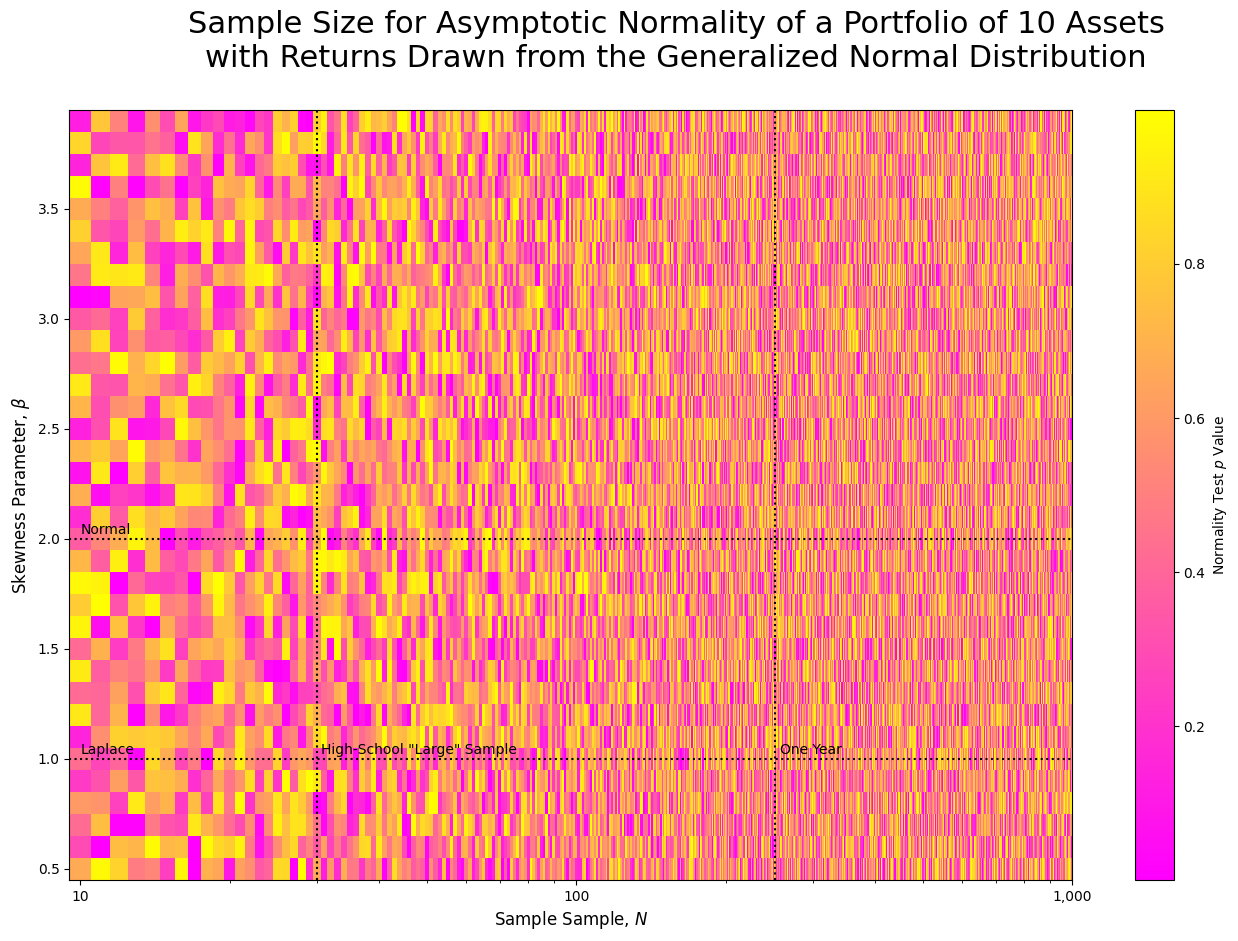

In [5]:
from scipy.ndimage import gaussian_filter
nprint("Displaying F.P.R. with Gaussian Filter sigma=%g." % (sigma:=zero))

Z=(df:=results.reset_index()).pivot_table(index="Beta",columns="Sample",values="Normal Test").values
X,Y=np.meshgrid(np.sort(df["Sample"].unique()),np.sort(df["Beta"].unique()))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
mesh=plot.pcolormesh(X,Y,gaussian_filter(Z,sigma) if sigma else Z,cmap='spring')
plot.set_xscale('log')
plot.xaxis.set_major_formatter(CountLabels(0))
plot.set_xlabel("Sample Sample, $N$",fontsize=12)
plot.set_ylabel("Skewness Parameter, $\\beta$",fontsize=12)
figure.suptitle(title:="Sample Size for Asymptotic Normality of a Portfolio of %d Assets\nwith Returns Drawn from the Generalized Normal Distribution" % portfolio_size,fontsize=22)

for y,t in (two,"Normal"),(one,"Laplace"):
    plot.axhline(y,color=(c:='black'),linestyle=':')
    plot.text(X.min(),y+0.01,t,color=c,ha='left',va='bottom')

for x,t in (30,'High-School "Large" Sample'),(252,'One Year'):
    plot.axvline(x,color=c,linestyle=':')
    plot.text(x*1.02,y+0.01,t,color=c,ha='left',va='bottom')

figure.colorbar(mesh,ax=plot,label='Normality Test $p$ Value')
figure.savefig(title.split("\n")[0]+".png",dpi=300,bbox_inches='tight')